Project Checkpoint 1

(A) Identification of Candidate Datasets

Identify three candidate datasets. Each dataset should:

- Align with at least one course topic (e.g., frequent itemsets, graphs, clustering, text, anomaly detection)

- Provide opportunities for at least one beyond-course technique

For each dataset, provide:
- Dataset name and source – Ex: Online Retail Dataset
- Course topic alignment – Ex: Frequent itemsets and association rule mining
- Potential beyond-course techniques – Ex: Sequential pattern mining not covered in lecture
- Dataset size and structure – Ex: 500K transactions, variable-length item baskets
- Data types – Ex: Transaction IDs, item IDs, timestamps
- Target variable(s), if any – Exs: None (unsupervised pattern mining), Engagement, Price
- Licensing or usage constraints – Ex: CC License

1. Hust dataset - BatteryLife: A Comprehensive Dataset and Benchmark forBattery Life Prediction
- Course: Graph Mining.
- Beyond: CyclePatch.
- Dataset size and structure: 77 Batteries with 500-1500 cycles. Consists of battery ID, cycle number and measurement points (300 per cycle).
- Data types: Time-series Voltage, Current, and Capacity.
- Target variable(s): End-of-life cycle number.
+1
- Licensing or usage constraints: Released publicly via GitHub (https://github.com/Ruifeng-Tan/BatteryLife).


2. WikiCS dataset - Delving into Instance-Dependent Label Noise in Graph Data: AComprehensive Study and Benchmark
- Course: Graph Mining, Anomaly detection.
- Beyond: Graph neural networks.
- Dataset size and structure: A directed graph with 10 classes, 11701 nodes, 216123 edges.
- Data types: 300 features per node, edge lists, and integer class labels.
- Target Variable(s): Article Category (10 distinct computer science sub-fields).
- Licensing or Usage Constraints: Released publicly via Github (https://github.com/kimsu55/BeGIN/blob/main/dataset/model_prediction/wikics_sage.npz). This benchmark and its findings are licensed under a Creative Commons Attribution 4.0 International License (CC BY 4.0).


3. Product-s dataset - Delving into Instance-Dependent Label Noise in Graph Data: AComprehensive Study and Benchmark
- Course: Graph mining, clustering.
- Beyond: Noise robust learning.
- Dataset Size and Structure: Nodes: 54,025. Edges: 74,420. A homophilic graph.
- Data types: Numerical feature vectors for each product node, edge relationships, and categorical labels.
- Target Variable(s): Product Category (44 distinct classes).
- Licensing or Usage Constraints: Released publicly via Github (https://github.com/kimsu55/BeGIN/blob/main/dataset/model_prediction/products_sage.npz). Licensed under a Creative Commons Attribution 4.0 International License (CC BY 4.0).



(B) Comparative Analysis of Datasets

Compare the three datasets with respect to both data properties AND course vs external techniques.

These are the required comparison dimensions that you should write up in a table in your report:

Supported data mining tasks – Ex:
- Retail data: Frequent itemsets (course), sequential patterns (external)
- Graph data: Centrality (course), node embeddings (external)
- Review data: Text mining (course), topic modeling (external)

Data quality issues – Ex:
- Missing transactions
- Noisy text
- Graph sparsity or disconnected components

Algorithmic feasibility – Ex:
- Can Apriori work on a dataset of this size?
- Is sequential pattern mining computationally feasible?
- Is graph size manageable without Spark?

Bias considerations – Ex:
- Recommendation bias in retail data
- Sampling bias in social media text

Ethical considerations – Ex:

- Will pursuing this analysis harm anyone?

- What are the social power dynamics involved in this dataset (e.g., employer vs. employee dynamic)?

| Dimension | WikiCS (Graph) | Products-s (Graph) | HUST (Time-Series) |
| :--- | :--- | :--- | :--- |
| **Tasks (Course)** | Graph Mining | Clustering | Graph mining |
| **Tasks (Ext)** | Graph neural networks | Noise-Robust Learning | CyclePatch |
| **Quality Issues** | Instance-dependent Label Noise | Graph Sparsity | Inconsistent Sampling Rates |
| **Algorithmic Feasibility** | Manageable in-memory | Manageable without Spark | Storage intensive |
| **Bias** | Linguistic/Domain Bias | Recommendation Bias | Equipment Bias |
| **Ethics** | Low risk (Public data on Wikipedia) | Commercial power dynamics | Safety related mispredictions possible, no power dynamics |

(C) Dataset Selection

Select one dataset and justify the choice – Ex:

Retail transaction logs

Reasons:
- Directly supports frequent itemsets and association rules (course)
- Supports sequential pattern mining not covered in class (external)
- Allows meaningful comparison between unordered and temporal patterns

Trade-offs:
- No natural text component
- Limited supervised learning opportunities

WikiCS

Reasons: It directly supports Graph Mining, such as calculating node centrality. It is a benchmark for Graph Neural Networks, a topic not covered in class. It allows for the implementation of models like a Graph Convolutional Network. The dataset includes 20 different training splits.

Trade-offs: The features are 300-dimensional numerical vectors rather than raw text. This saves time on cleaning the data but limits feature development. The nodes tend to link to others that are in the same category (homophilic).



(D) Exploratory Data Analysis (Selected Dataset Only)

Perform EDA – Ex:
- Distribution of basket sizes
- Frequency of top items
- Sparsity of item co-occurrence
- Temporal gaps between transactions
- Initial observations motivating external techniques

/tmp/ipython-input-2957100668.py:10: UserWarning: The WikiCS dataset now returns an undirected graph by default. Please explicitly specify 'is_undirected=False' to restore the old behavior.
  dataset = WikiCS(root='/tmp/WikiCS')


--- Dataset Basic Info ---
Number of nodes (Articles): 11701
Number of edges (Hyperlinks): 431726
Number of features per node: 300
Number of classes (CS Fields): 10

--- Graph Connectivity ---
Average Node Degree: 36.90
Max Degree (Most linked article): 3324
Min Degree: 1
Is undirected: True

--- Class Distribution ---
Class 0: 295 articles
Class 1: 667 articles
Class 2: 2153 articles
Class 3: 1933 articles
Class 4: 2679 articles
Class 5: 780 articles
Class 6: 413 articles
Class 7: 865 articles
Class 8: 492 articles
Class 9: 1424 articles
--- EDA ---
Graph Homophily Ratio: 0.6547
Interpretation: 65.5% of links connect articles in the same category.


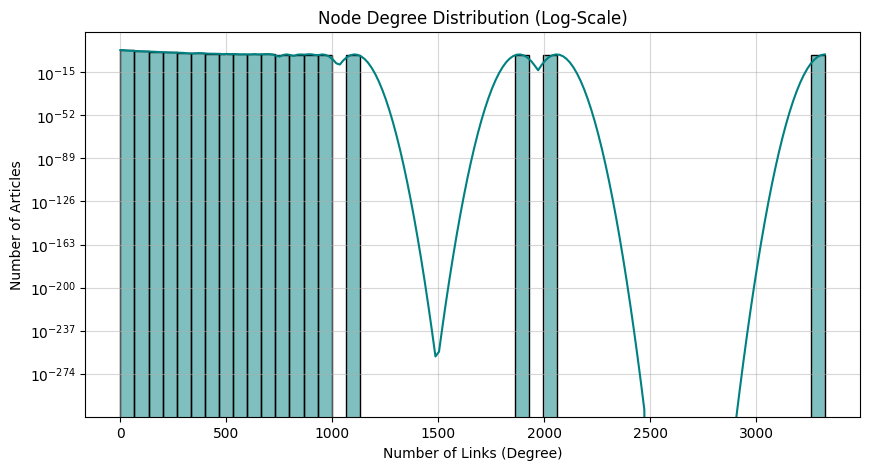


--- Running Integrity Tests ---
No missing values in features.
Labels are within valid range [0, 9].
Edge symmetry verified.
Feature dimensions are correct.

All tests passed!


In [6]:
!pip install torch_geometric
import torch
from torch_geometric.datasets import WikiCS
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns

# Load the dataset
dataset = WikiCS(root='/tmp/WikiCS')
data = dataset[0]

# Print Basic Stats
print(f"--- Dataset Basic Info ---")
print(f"Number of nodes (Articles): {data.num_nodes}")
print(f"Number of edges (Hyperlinks): {data.num_edges}")
print(f"Number of features per node: {data.num_node_features}")
print(f"Number of classes (CS Fields): {dataset.num_classes}")

# Calculate Node Degrees
row, col = data.edge_index
degrees = Counter(row.tolist())
degree_values = list(degrees.values())
avg_degree = sum(degree_values) / data.num_nodes

print(f"\n--- Graph Connectivity ---")
print(f"Average Node Degree: {avg_degree:.2f}")
print(f"Max Degree (Most linked article): {max(degree_values)}")
print(f"Min Degree: {min(degree_values)}")
print(f"Is undirected: {data.is_undirected()}")

# Class Distribution
class_counts = Counter(data.y.tolist())
print(f"\n--- Class Distribution ---")
for cls, count in sorted(class_counts.items()):
    print(f"Class {cls}: {count} articles")


# 1. Calculate Homophily (Edge-based)
edge_index = data.edge_index
y = data.y
# Count how many edges connect nodes with the same label
src, dst = edge_index
same_label = (y[src] == y[dst]).sum().item()
homophily_ratio = same_label / data.num_edges

print(f"--- EDA ---")
print(f"Graph Homophily Ratio: {homophily_ratio:.4f}")
print(f"Interpretation: {homophily_ratio*100:.1f}% of links connect articles in the same category.")

# 2. Visualize Degree Distribution (Crucial for Identifying Hubs)
plt.figure(figsize=(10, 5))
sns.histplot(degree_values, bins=50, kde=True, color='teal')
plt.title("Node Degree Distribution (Log-Scale)")
plt.xlabel("Number of Links (Degree)")
plt.ylabel("Number of Articles")
plt.yscale('log') # Log scale because of the 3324 outlier
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

# Tests

def run_tests(data, dataset):
    print("\n--- Running Integrity Tests ---")

    # 1. Check for Missing Data (NaNs)
    assert not torch.isnan(data.x).any(), "Test Failed: Found NaN values in node features!"
    print("No missing values in features.")

    # 2. Label Consistency
    assert data.y.min() >= 0 and data.y.max() < dataset.num_classes, "Test Failed: Labels are out of bounds!"
    print(f"Labels are within valid range [0, {dataset.num_classes-1}].")

    # 3. Connectivity Logic
    assert data.edge_index.shape[1] % 2 == 0, "Test Failed: Edge count should be even for an undirected graph!"
    print("Edge symmetry verified.")

    # 4. Feature Dimensionality
    assert data.x.shape[1] == 300, f"Test Failed: Expected 300 features, got {data.x.shape[1]}"
    print("Feature dimensions are correct.")

    print("\nAll tests passed!")

run_tests(data, dataset)

After looking at the EDA a motivation for using a Graph neural network is the degree being 3324. If I use a basic algorithm that one hub is going to have too much influence. A GNN will work better because I can use specific layers to sample neighbors so these hubs don't drown out the more specific connections.

(E) Initial Insights and Direction – Ex:

Observation: Most items appear in fewer than 1% of transactions
Hypothesis: High support thresholds miss meaningful temporal patterns

Potential RQs:
- How do different support thresholds affect rule quality?
- Do sequential patterns reveal structure missed by frequent itemsets?

Observation:
The EDA shows a Homophily Ratio of 0.6547. This means that 34.5% of hyperlinks connect articles that are in different categories. Also the max degree being 3324 shows that the graph is mostly influenced by only a few hubs.

Potential RQs:

Does a Graph neural network actually perform better?

Do the large hubs affect accuracy?

If I remove high degree nodes, does the classification of its neighbors actually improve?

(F) GitHub Portfolio Building –

- We expect you to post your project code on your professional GitHub as the course progresses; this is to help you build a portfolio, so you will have work that you have done to talk about when you are interviewing for jobs.

- Include a link to your public GitHub repository for the project, with your first notebook posted.

- We also encourage you to create an initial README describing the project; as an example, see: https://github.com/mariateleki/zscoreLinks to an external site.

https://github.com/MHinzie/WikiCS-GraphMining

Resources:
1. Collaborators: None
2. Web Sources: https://pytorch-geometric.readthedocs.io/en/2.5.1/generated/torch_geometric.datasets.WikiCS.html, https://dl.acm.org/doi/epdf/10.1145/3711896.3737376, https://github.com/kimsu55/BeGIN/blob/main/README.md, https://dl.acm.org/doi/epdf/10.1145/3711896.3737372

3. AI Tools:

4. Citations:

WikiCS dataset

@article{mernyei2020wiki,
  title={Wiki-CS: A Wikipedia-Based Benchmark for Graph Neural Networks},
  author={Mernyei, P{\'e}ter and Cangea, C{\u{a}}t{\u{a}}lina},
  journal={arXiv preprint arXiv:2007.02901},
  year={2020}
}

WikiCS and Product-s dataset paper

@inproceedings{10.1145/3711896.3737376,
author = {Kim, Suyeon and Kang, SeongKu and Kim, Dongwoo and Ok, Jungseul and Yu, Hwanjo},
title = {Delving into Instance-Dependent Label Noise in Graph Data: A Comprehensive Study and Benchmark},
year = {2025},
isbn = {9798400714542},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3711896.3737376},
doi = {10.1145/3711896.3737376},
abstract = {Graph Neural Networks (GNNs) have achieved state-of-the-art performance in node classification tasks but struggle with label noise in real-world data. Existing studies on graph learning with label noise commonly rely on class-dependent label noise, overlooking the complexities of instance-dependent noise and falling short of capturing real-world corruption patterns. We introduce BeGIN (Benchmarking for Graphs with Instance-dependent Noise), a new benchmark that provides realistic graph datasets with various noise types and comprehensively evaluates noise-handling strategies across GNN architectures, noisy label detection, and noise-robust learning. To simulate instance-dependent corruptions, BeGIN introduces algorithmic methods and LLM-based simulations. Our experiments reveal the challenges of instance-dependent noise, particularly LLM-based corruption, and underscore the importance of node-specific parameterization to enhance GNN robustness. By comprehensively evaluating noise-handling strategies, BeGIN provides insights into their effectiveness, efficiency, and key performance factors. We expect that BeGIN will serve as a valuable resource for advancing research on label noise in graphs and fostering the development of robust GNN training methods. The code is available at https://github.com/kimsu55/BeGIN.},
booktitle = {Proceedings of the 31st ACM SIGKDD Conference on Knowledge Discovery and Data Mining V.2},
pages = {5539–5550},
numpages = {12},
keywords = {graph neural networks, label noise, node classification},
location = {Toronto ON, Canada},
series = {KDD '25}
}

HUST dataset

@inproceedings{10.1145/3711896.3737372,
author = {Tan, Ruifeng and Hong, Weixiang and Tang, Jiayue and Lu, Xibin and Ma, Ruijun and Zheng, Xiang and Li, Jia and Huang, Jiaqiang and Zhang, Tong-Yi},
title = {BatteryLife: A Comprehensive Dataset and Benchmark for Battery Life Prediction},
year = {2025},
isbn = {9798400714542},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3711896.3737372},
doi = {10.1145/3711896.3737372},
booktitle = {Proceedings of the 31st ACM SIGKDD Conference on Knowledge Discovery and Data Mining V.2},
pages = {5789–5800},
numpages = {12},
location = {Toronto ON, Canada},
series = {KDD '25}
}

@inproceedings{
zhang2024batteryml,
title={Battery{ML}: An Open-source Platform for Machine Learning on Battery Degradation},
author={Han Zhang and Xiaofan Gui and Shun Zheng and Ziheng Lu and Yuqi Li and Jiang Bian},
booktitle={The Twelfth International Conference on Learning Representations},
year={2024},
url={https://openreview.net/forum?id=sxGugrYhP9}
}

HUST Paper

@inproceedings{10.1145/3711896.3737372,
author = {Tan, Ruifeng and Hong, Weixiang and Tang, Jiayue and Lu, Xibin and Ma, Ruijun and Zheng, Xiang and Li, Jia and Huang, Jiaqiang and Zhang, Tong-Yi},
title = {BatteryLife: A Comprehensive Dataset and Benchmark for Battery Life Prediction},
year = {2025},
isbn = {9798400714542},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3711896.3737372},
doi = {10.1145/3711896.3737372},
abstract = {Battery Life Prediction (BLP), which relies on time series data produced by battery degradation tests, is crucial for battery utilization, optimization, and production. Despite impressive advancements, this research area faces three key challenges. Firstly, the limited size of existing datasets impedes insights into modern battery life data. Secondly, most datasets are restricted to small-capacity lithium-ion batteries tested under a narrow range of diversity in labs, raising concerns about the generalizability of findings. Thirdly, inconsistent and limited benchmarks across studies obscure the effectiveness of baselines and leave it unclear if models popular in other time series fields are effective for BLP. To address these challenges, we propose BatteryLife, a comprehensive dataset and benchmark for BLP. BatteryLife integrates 16 datasets, offering a 2.5 times sample size compared to the previous largest dataset, and provides the most diverse battery life resource with batteries from 8 formats, 59 chemical systems, 9 operating temperatures, and 421 charge/discharge protocols, including both laboratory and industrial tests. Notably, BatteryLife is the first to release battery life datasets of zinc-ion batteries, sodium-ion batteries, and industry-tested large-capacity lithium-ion batteries. With the comprehensive dataset, we revisit the effectiveness of baselines popular in this and other time series fields. Furthermore, we propose CyclePatch, a plug-in technique that can be employed in various neural networks. Extensive benchmarking of 18 methods reveals that models popular in other time series fields can be unsuitable for BLP, and CyclePatch consistently improves model performance establishing state-of-the-art benchmarks. Moreover, BatteryLife evaluates model performance across aging conditions and domains. BatteryLife is available at https://github.com/Ruifeng-Tan/BatteryLife.},
booktitle = {Proceedings of the 31st ACM SIGKDD Conference on Knowledge Discovery and Data Mining V.2},
pages = {5789–5800},
numpages = {12},
keywords = {AI for chemistry, battery, materials informatics, time series},
location = {Toronto ON, Canada},
series = {KDD '25}
}